<a href="https://colab.research.google.com/github/Chesta1/Playground_series_prediction/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e11

 56% 5.00M/9.00M [00:00<00:00, 36.0MB/s]
100% 9.00M/9.00M [00:00<00:00, 50.5MB/s]


In [3]:
zip_ref = zipfile.ZipFile('/content/playground-series-s3e11.zip',"r")

zip_ref.extractall()
zip_ref.close()

In [4]:
data = pd.read_csv('/content/train.csv')
data.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [5]:
data.duplicated().sum()

0

In [6]:
test_data = pd.read_csv('/content/test.csv')
test_data.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [7]:
data.shape

(360336, 17)

In [8]:
test_data.shape

(240224, 16)

In [9]:
data.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [10]:
test_data.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

In [11]:
data.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [12]:
test_data.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.00000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,480447.50000,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,69346.83987,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,360336.00000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,420391.75000,3.750000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,480447.50000,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,540503.25000,8.400000,4.000000,4.000000,1.000000,3.000000,17.800000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,600559.00000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix Among Variables of Train Data')

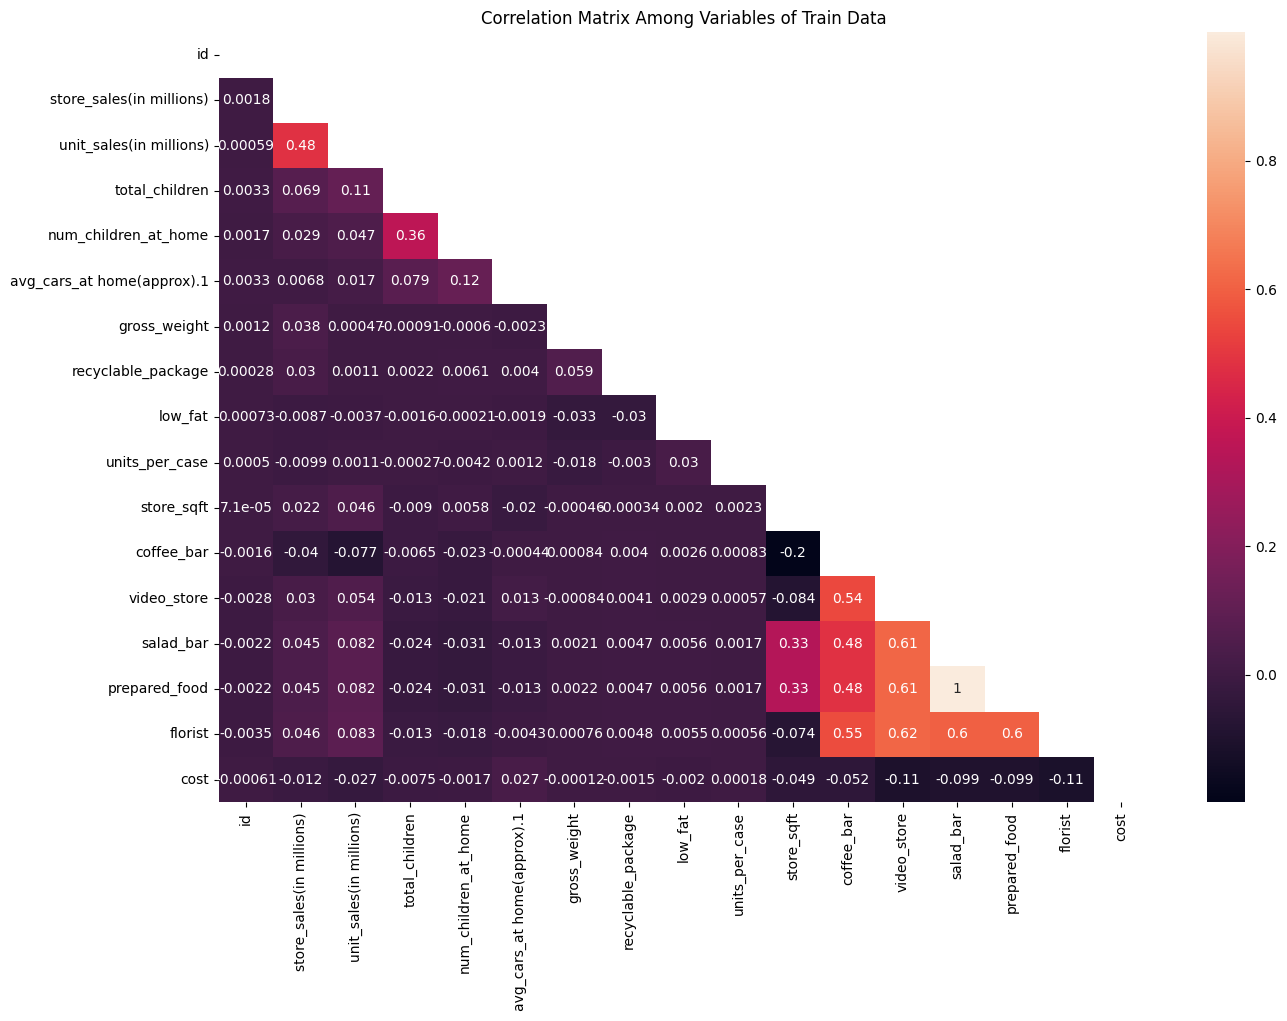

In [13]:
plt.figure(figsize=(15,10))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,annot=True,mask=mask)
plt.title('Correlation Matrix Among Variables of Train Data')

# **Correlation Matrix Conclusions Train Data**
While looking at the correlation matrix among variables of the data set we can make certain conclusions

* Unit sales in millions have a positive relation with the store sales in millions - 0.46. As unit sales or quantity of items sold in the stores increasing this leads to increase in  total sales of stores

* there is significant correlation among the facilities(florist,video_bar,coffee_bar,salad_bar) which have been avialbale by the stores that might impct the costing of the campaigns.
* Preparedfood and salad bar has significant correlation that can cause **multicollinearity** because of which we can remove one of the variable.
* Store_sq_ft has significant postive relation in respect to Salad_bar and prepared_food. With this we can make an assumption more focus is towards the salad_food by the stores.

**Multicollinearity** When features are highly correlated to one another. The easiest way to visualize multicollinearity is by creating the Correlation Matrix.

Over here we can see there ois perfect correlation between **prepared_food** and **salad_bar** having value of 1.

Text(0.5, 1.0, 'Correlation Matrix Among Variables of Test Data')

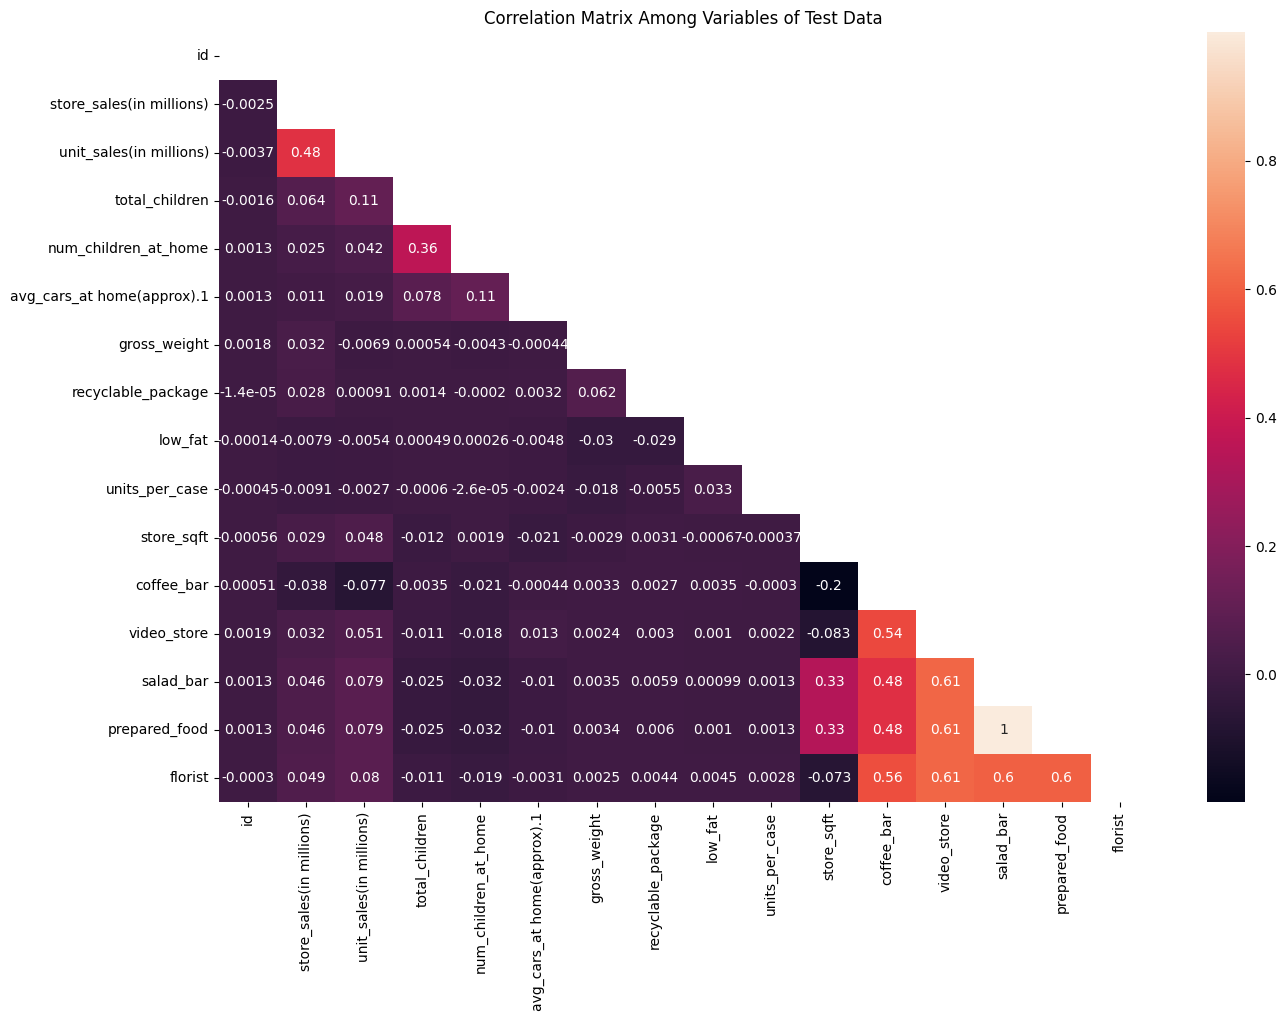

In [14]:
plt.figure(figsize=(15,10))
correlation = test_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,annot=True,mask=mask)
plt.title('Correlation Matrix Among Variables of Test Data')

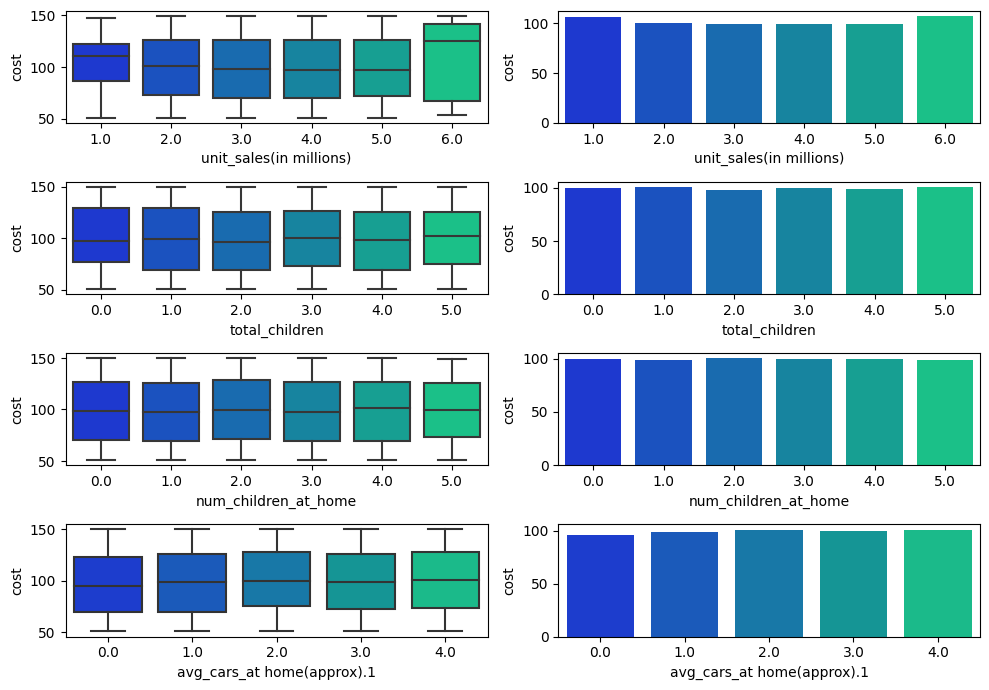

In [15]:
grouped_data = data.groupby(['unit_sales(in millions)'])['cost'].agg('mean').reset_index()

fig, axs = plt.subplots(nrows =4,ncols=2, figsize=(10, 7))
garph = sns.boxplot(x='unit_sales(in millions)',y='cost',hue='unit_sales(in millions)',data=data,dodge=False,palette = 'winter',ax=axs[0][0])
garph.get_legend().remove()

garph2 = sns.barplot(x='unit_sales(in millions)',y='cost',data=grouped_data,hue='unit_sales(in millions)',dodge=False,ax=axs[0][1],palette = 'winter')
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper right', borderaxespad=0)
garph2.get_legend().remove()
plt.tight_layout()


garph3 = sns.boxplot(x='total_children',y='cost',hue='total_children',data=data,dodge=False,palette = 'winter',ax=axs[1][0])
garph3.get_legend().remove()

grouped_data_cost = data.groupby(['total_children'])['cost'].agg('mean').reset_index()
garph4 = sns.barplot(x='total_children',y='cost',data=grouped_data_cost,hue='total_children',dodge=False,ax=axs[1][1],palette = 'winter')
garph4.get_legend().remove()
plt.tight_layout()


garph3 = sns.boxplot(x='num_children_at_home',y='cost',hue='num_children_at_home',data=data,dodge=False,palette = 'winter',ax=axs[2][0])
garph3.get_legend().remove()

grouped_data_cost = data.groupby(['num_children_at_home'])['cost'].agg('mean').reset_index()
garph4 = sns.barplot(x='num_children_at_home',y='cost',data=grouped_data_cost,hue='num_children_at_home',dodge=False,ax=axs[2][1],palette = 'winter')
garph4.get_legend().remove()
plt.tight_layout()


garph3 = sns.boxplot(x='avg_cars_at home(approx).1',y='cost',hue='avg_cars_at home(approx).1',data=data,dodge=False,palette = 'winter',ax=axs[3][0])
garph3.get_legend().remove()

grouped_data_cost = data.groupby(['avg_cars_at home(approx).1'])['cost'].agg('mean').reset_index()
garph4 = sns.barplot(x='avg_cars_at home(approx).1',y='cost',data=grouped_data_cost,hue='avg_cars_at home(approx).1',dodge=False,ax=axs[3][1],palette = 'winter')
garph4.get_legend().remove()
plt.tight_layout()


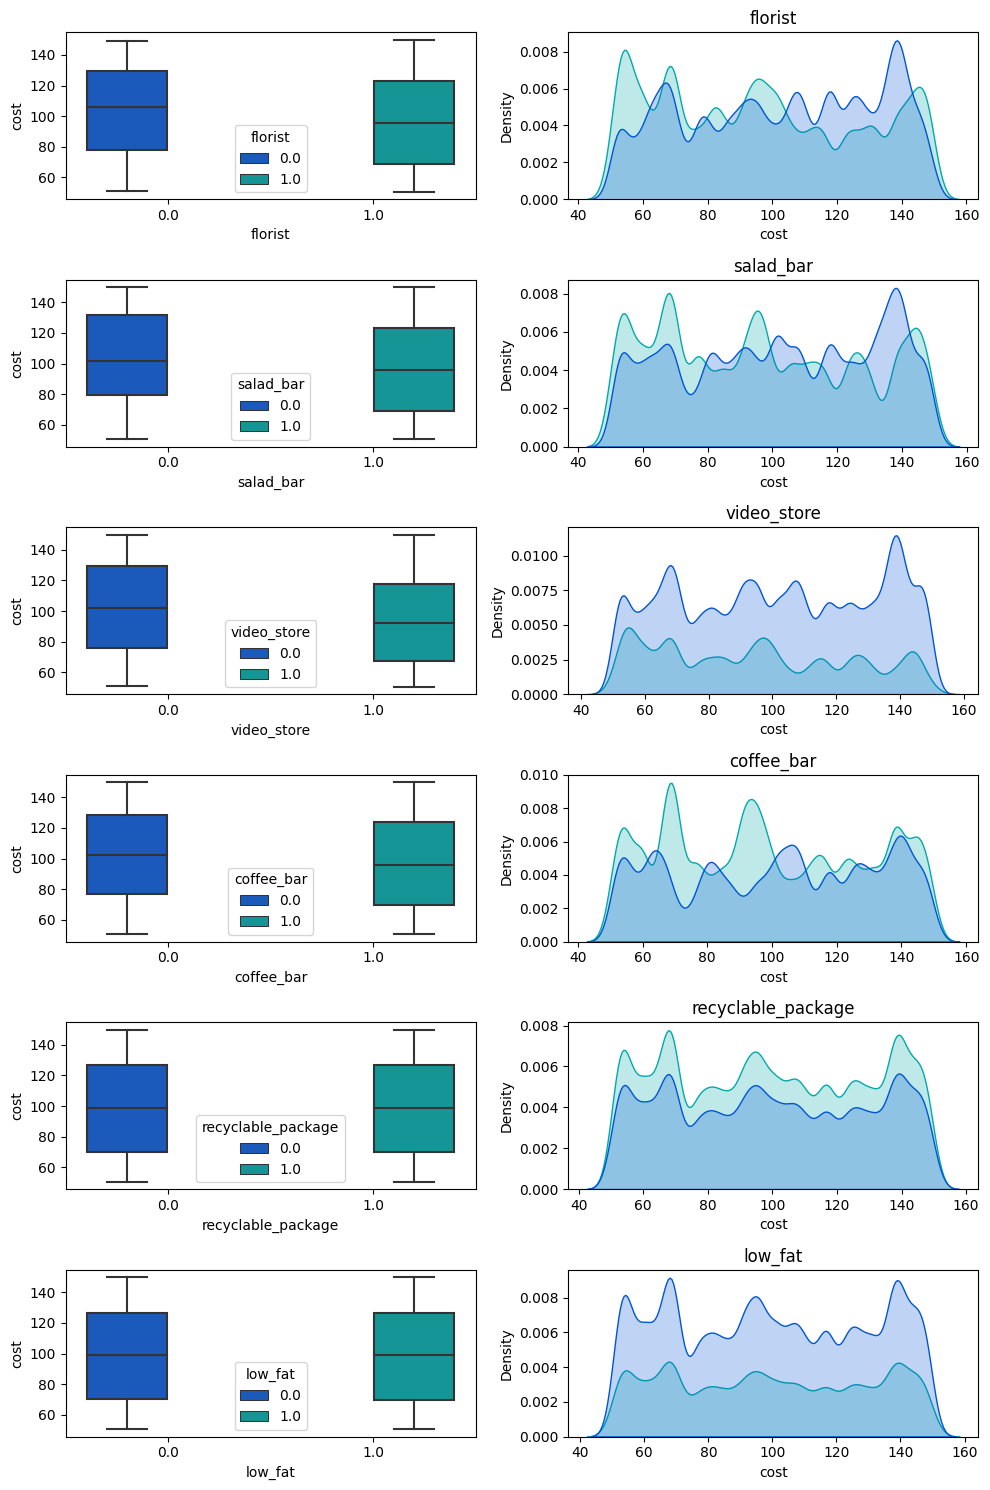

In [16]:
## get the binary data which is florist, salad_bar, video_store, coffee_bar
binary_data = ['florist','salad_bar','video_store','coffee_bar','recyclable_package','low_fat']
i=1
j=2

plt.figure(figsize = [10,15])
plt.subplots_adjust(hspace = 0.5)

for col in binary_data:
  # print(col)
  plt.subplot(6,2,i)
  sns.boxplot(x=col,y='cost',data=data,palette='winter',hue=col)
  plt.tight_layout()

  plt.subplot(6,2,j)

  sns.kdeplot(data = data,
            x = 'cost',
            hue = col,
            fill = 'stack',
            palette = 'winter',
            shade = True,
            legend = False)
  plt.title(col)
  plt.tight_layout()

  i+=2
  j+=2

  



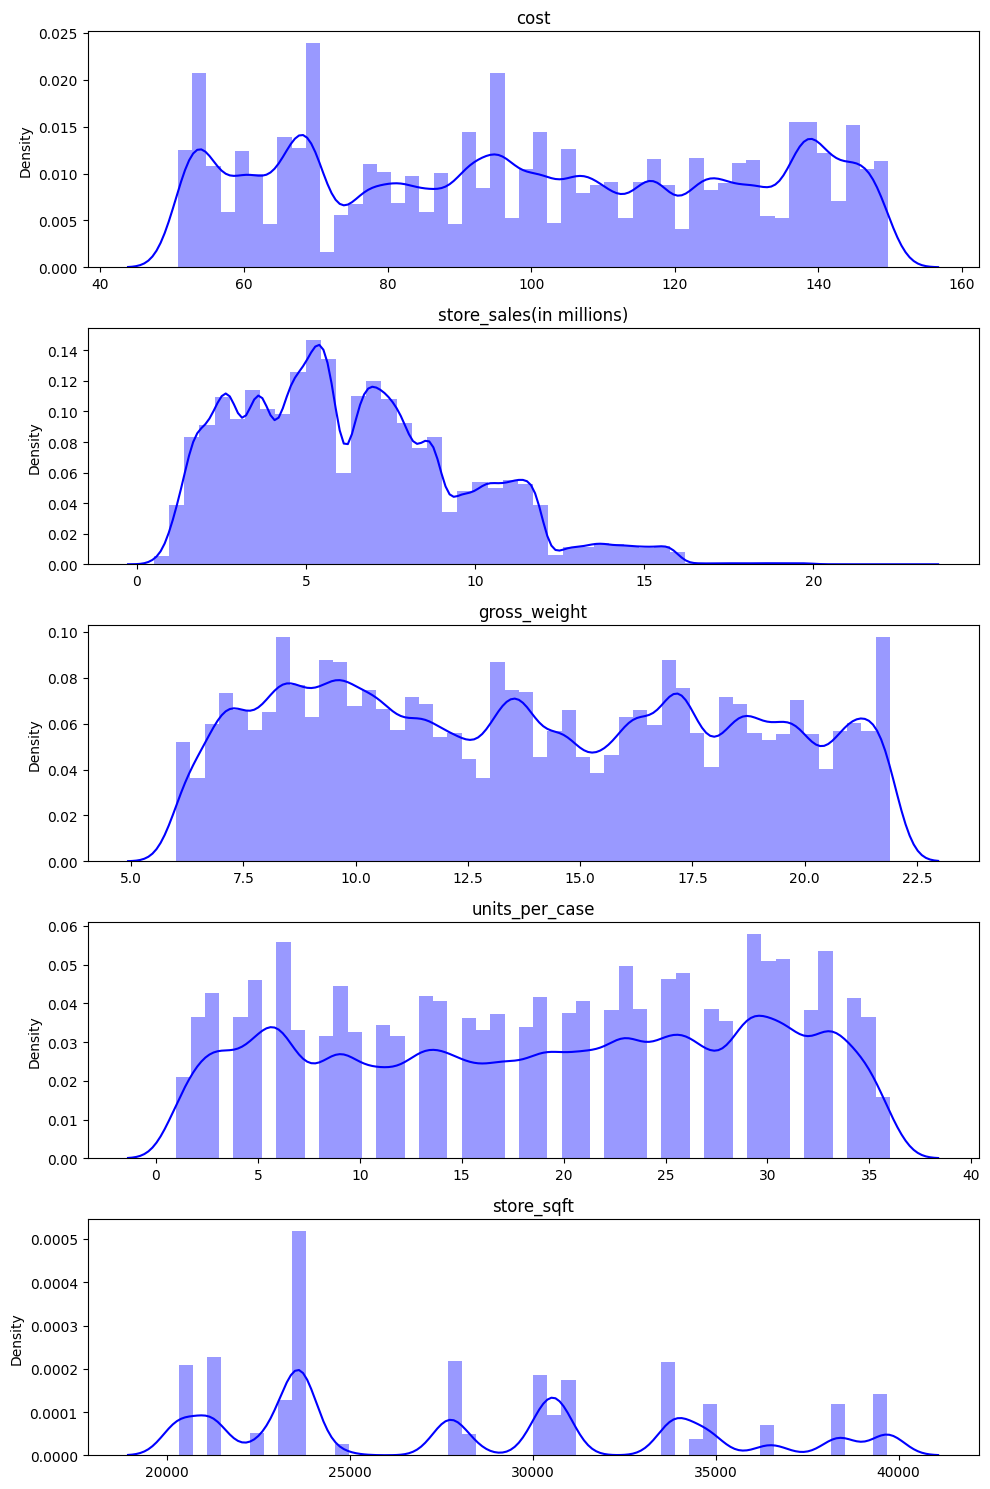

In [17]:
## look for histogram or distribution of numerical values

numerical_col= ['cost','store_sales(in millions)','gross_weight','units_per_case','store_sqft']
i = 1
plt.figure(figsize = [10,15])
plt.subplots_adjust(hspace = 0.5)
for col in numerical_col:
  plt.subplot(5,1,i)
  sns.distplot(x=data[col],color='blue')
  plt.title(col)
  i+=1
  plt.tight_layout()

<Axes: xlabel='unit_sales(in millions)', ylabel='store_sales(in millions)'>

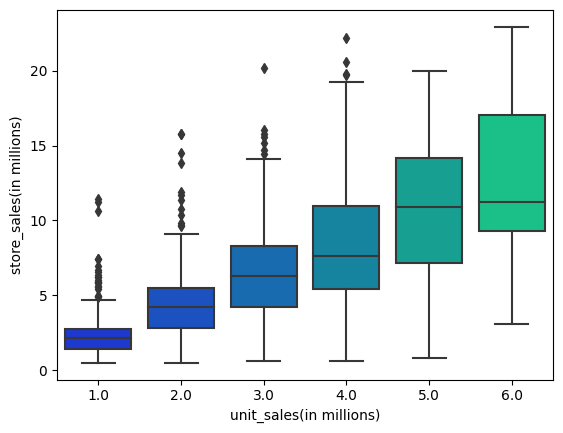

In [18]:
sns.boxplot(x='unit_sales(in millions)',y='store_sales(in millions)',data=data,palette='winter')

In [19]:
data.drop(columns='prepared_food',inplace=True)

Begin with the Modeling part and do so feature engineering where we'll be performing onehot encoding on the binary and ordinal datasets using Column Transformer first

In [20]:
## Let's begin modeling part 
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

In [21]:
cat_data = [ 'unit_sales(in millions)',
        'avg_cars_at home(approx).1',
       'recyclable_package', 'low_fat', 
       'coffee_bar', 'video_store', 'salad_bar', 'florist']

numeric_data = [ 'store_sales(in millions)',
       'gross_weight', 'units_per_case','total_children', 'num_children_at_home',
       'store_sqft']

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_data),
        ('onehot', OneHotEncoder(), cat_data)
    ])


X = data.drop(["cost",'id'],axis=1)
y= data.cost

In [24]:
from sklearn.model_selection import train_test_split

# Importance of scaling of numerical values.

* Scaling helps to compare independent features having different ranges or units. After making them standardized or converting to comparable values.


In [25]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [28]:
transformed_data_train = pipeline.fit_transform(X_train)
transformed_data_test = pipeline.fit_transform(X_test)

In [29]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['store_sales(in millions)',
                                                   'gross_weight',
                                                   'units_per_case',
                                                   'total_children',
                                                   'num_children_at_home',
                                                   'store_sqft']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['unit_sales(in millions)',
                                                   'avg_cars_at home(approx).1',
                                                   'recyclable_package',
                                                   'low_fat', 'coffee_bar',
                                                   'video_store', 'salad_bar',
                                                   'florist'])]))])

In [32]:
transformed_data_train[1]

array([0.29049531, 0.16477987, 0.05714286, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        ])

In [33]:
encoded_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(input_features=cat_data)

In [69]:
feature_names=numeric_data+list(encoded_cols)
# feature_names

In [35]:
from sklearn.model_selection import KFold, RandomizedSearchCV,cross_validate,cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Cross Validation

What is the importance of **CV**

* This helps in doing evaluation of Machine Learning Models via training several ML models on subsedt of the input data and further evaluating them on complementary subset data which further can be termed as **validation data**.

Here we are using the **KFold** methodology for doing cross validation where we divide the training data into various Folds, here we are creating 5fold and among those five folds, we keep one separate on which evaluation of ML model will take place. This process would be repeated five times. And lastly we'll evaluate the mean accuracy of the model and also able to find how much standard deviation is there or we can expect from the model when we run it on the test_data which it haven't seen.

* This procedure will help in making the model generalized by reducing the overfitting problem that leads to high variance which means model fits so well on the training data that it learns training data so well it is able to capture the noise even and thereby providing inconsistent results on test on real time observations.

* Thus to over come the problem of this overfitting and making predictions more generalized we use cross validation.

# Ensemble Learning

* For making predictions for the Data set we are using ensemble learning algorithms. 

* Ensemble learning is based on creation of multiple machine learning models on resampled subset data based out of the original raw data.

## RandomForest Regressor

* this algorithm is based on advance ensemble learning technique known as **bagging** or also known as **bootstrap aggregation**.

* With the help of RF we can reduce the problem of overfitting which we generally face during creation of Decision Tree algorithm, as this is algorithm is more flexible and helps in reducing the problem of high variance. 

* Two steps are there in creation of RF model. **1)** creation of subset of data in which one observation can occur more than once. Also this subset data would have observations less than that of our original dataset. **2)** In our second step we'll be creating the decision tree model on our subset data where we randomly pick any of the two or three variables and whichever the variable provides less value of **Gini Impurity** for making the decision would be selected for the root node of olur decision tree. Again same above cited application will be applied till we come to our conclusion or untill we won't reach our final leaf node. 

This two steps of RF will create one decision tree and then again same process will be repeated fo making our second or n decision trees that has been specified by the user.

Lastly for our final result in terms of prediction we'll be using the aggregate value which comes out of all the decision tree models.

Various decision tree models which have been created are also known as **WeakLearners**. These have been created on various different sampled subset data from raw data.

Thus, it is known as **Bootstrap Aggregation**.

* In Bagging technique we are creating trees parallely or the base or weak learners are being created parallely.

In [36]:
transformed_data_train = pd.DataFrame(transformed_data_train,columns=feature_names)
transformed_data_test=pd.DataFrame(transformed_data_test,columns=feature_names)

In [37]:
from numpy import mean
from numpy import std

parameters={
    'n_estimators':[100,200],
    'max_depth':[10,20],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5],
    'bootstrap':[True,False],
    
}

kfold = KFold(n_splits=5,shuffle=True,random_state=42)

rf = RandomForestRegressor(random_state=42,n_estimators=500,max_depth=10,min_samples_leaf=7,min_samples_split=4,max_features='auto',n_jobs=-1)

clf = cross_val_score(rf,transformed_data_train,y_train,cv=kfold,error_score='raise',scoring='neg_mean_absolute_error')
print('MAE: %.3f (%.3f)' % (mean(clf), std(clf)))


MAE: -24.140 (0.030)


In [39]:
rf.fit(transformed_data_train,y_train)


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=7,
                      min_samples_split=4, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf_pred = rf.predict(transformed_data_test)
mean_squared_error(y_test,rf_pred)

801.101583862746

In [41]:
mean_absolute_error(y_test,rf_pred)

24.151447399205942

In [43]:
parameters={
    'n_estimators':[100,200],
    'max_depth':[10,20],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5],
    'bootstrap':[True,False],
    
}

kfold = KFold(n_splits=5,shuffle=True,random_state=42)

rf = RandomForestRegressor(random_state=42)

clf = RandomizedSearchCV(rf,
                         parameters,
                          n_iter=100,
                         scoring='neg_mean_absolute_error',
                         cv=kfold,
                         n_jobs=-1,
                         verbose=1,
                         error_score='raise'
                         )
search = clf.fit(transformed_data_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [44]:
best_params = search.best_params_

In [45]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [47]:
evaluate(search,transformed_data_test,y_test)

Model Performance
Average Error: 23.7816 degrees.
Accuracy = 72.54%.


72.5417853069399

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [49]:
y_pred_cv = search.predict(transformed_data_test)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_cv)

800.429182280103

In [54]:
rf_model_cv= RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=4,max_features='auto',max_depth=20,bootstrap=True)

In [56]:
rf_model_cv.fit(transformed_data_train,(y_train))

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      n_estimators=200)

In [58]:
feature_scores = pd.Series(rf_model_cv.feature_importances_,index=transformed_data_train.columns).sort_values(ascending=False)
feature_scores

store_sales(in millions)          0.218382
gross_weight                      0.198585
units_per_case                    0.141097
store_sqft                        0.107578
total_children                    0.074583
num_children_at_home              0.057688
florist_1.0                       0.024864
unit_sales(in millions)_3.0       0.016686
avg_cars_at home(approx).1_1.0    0.015883
avg_cars_at home(approx).1_2.0    0.015369
avg_cars_at home(approx).1_3.0    0.015064
unit_sales(in millions)_4.0       0.012175
recyclable_package_1.0            0.011972
recyclable_package_0.0            0.011798
avg_cars_at home(approx).1_4.0    0.011378
low_fat_0.0                       0.010767
low_fat_1.0                       0.010608
unit_sales(in millions)_2.0       0.010542
avg_cars_at home(approx).1_0.0    0.010343
coffee_bar_0.0                    0.006543
salad_bar_0.0                     0.005186
video_store_1.0                   0.003880
salad_bar_1.0                     0.002439
coffee_bar_

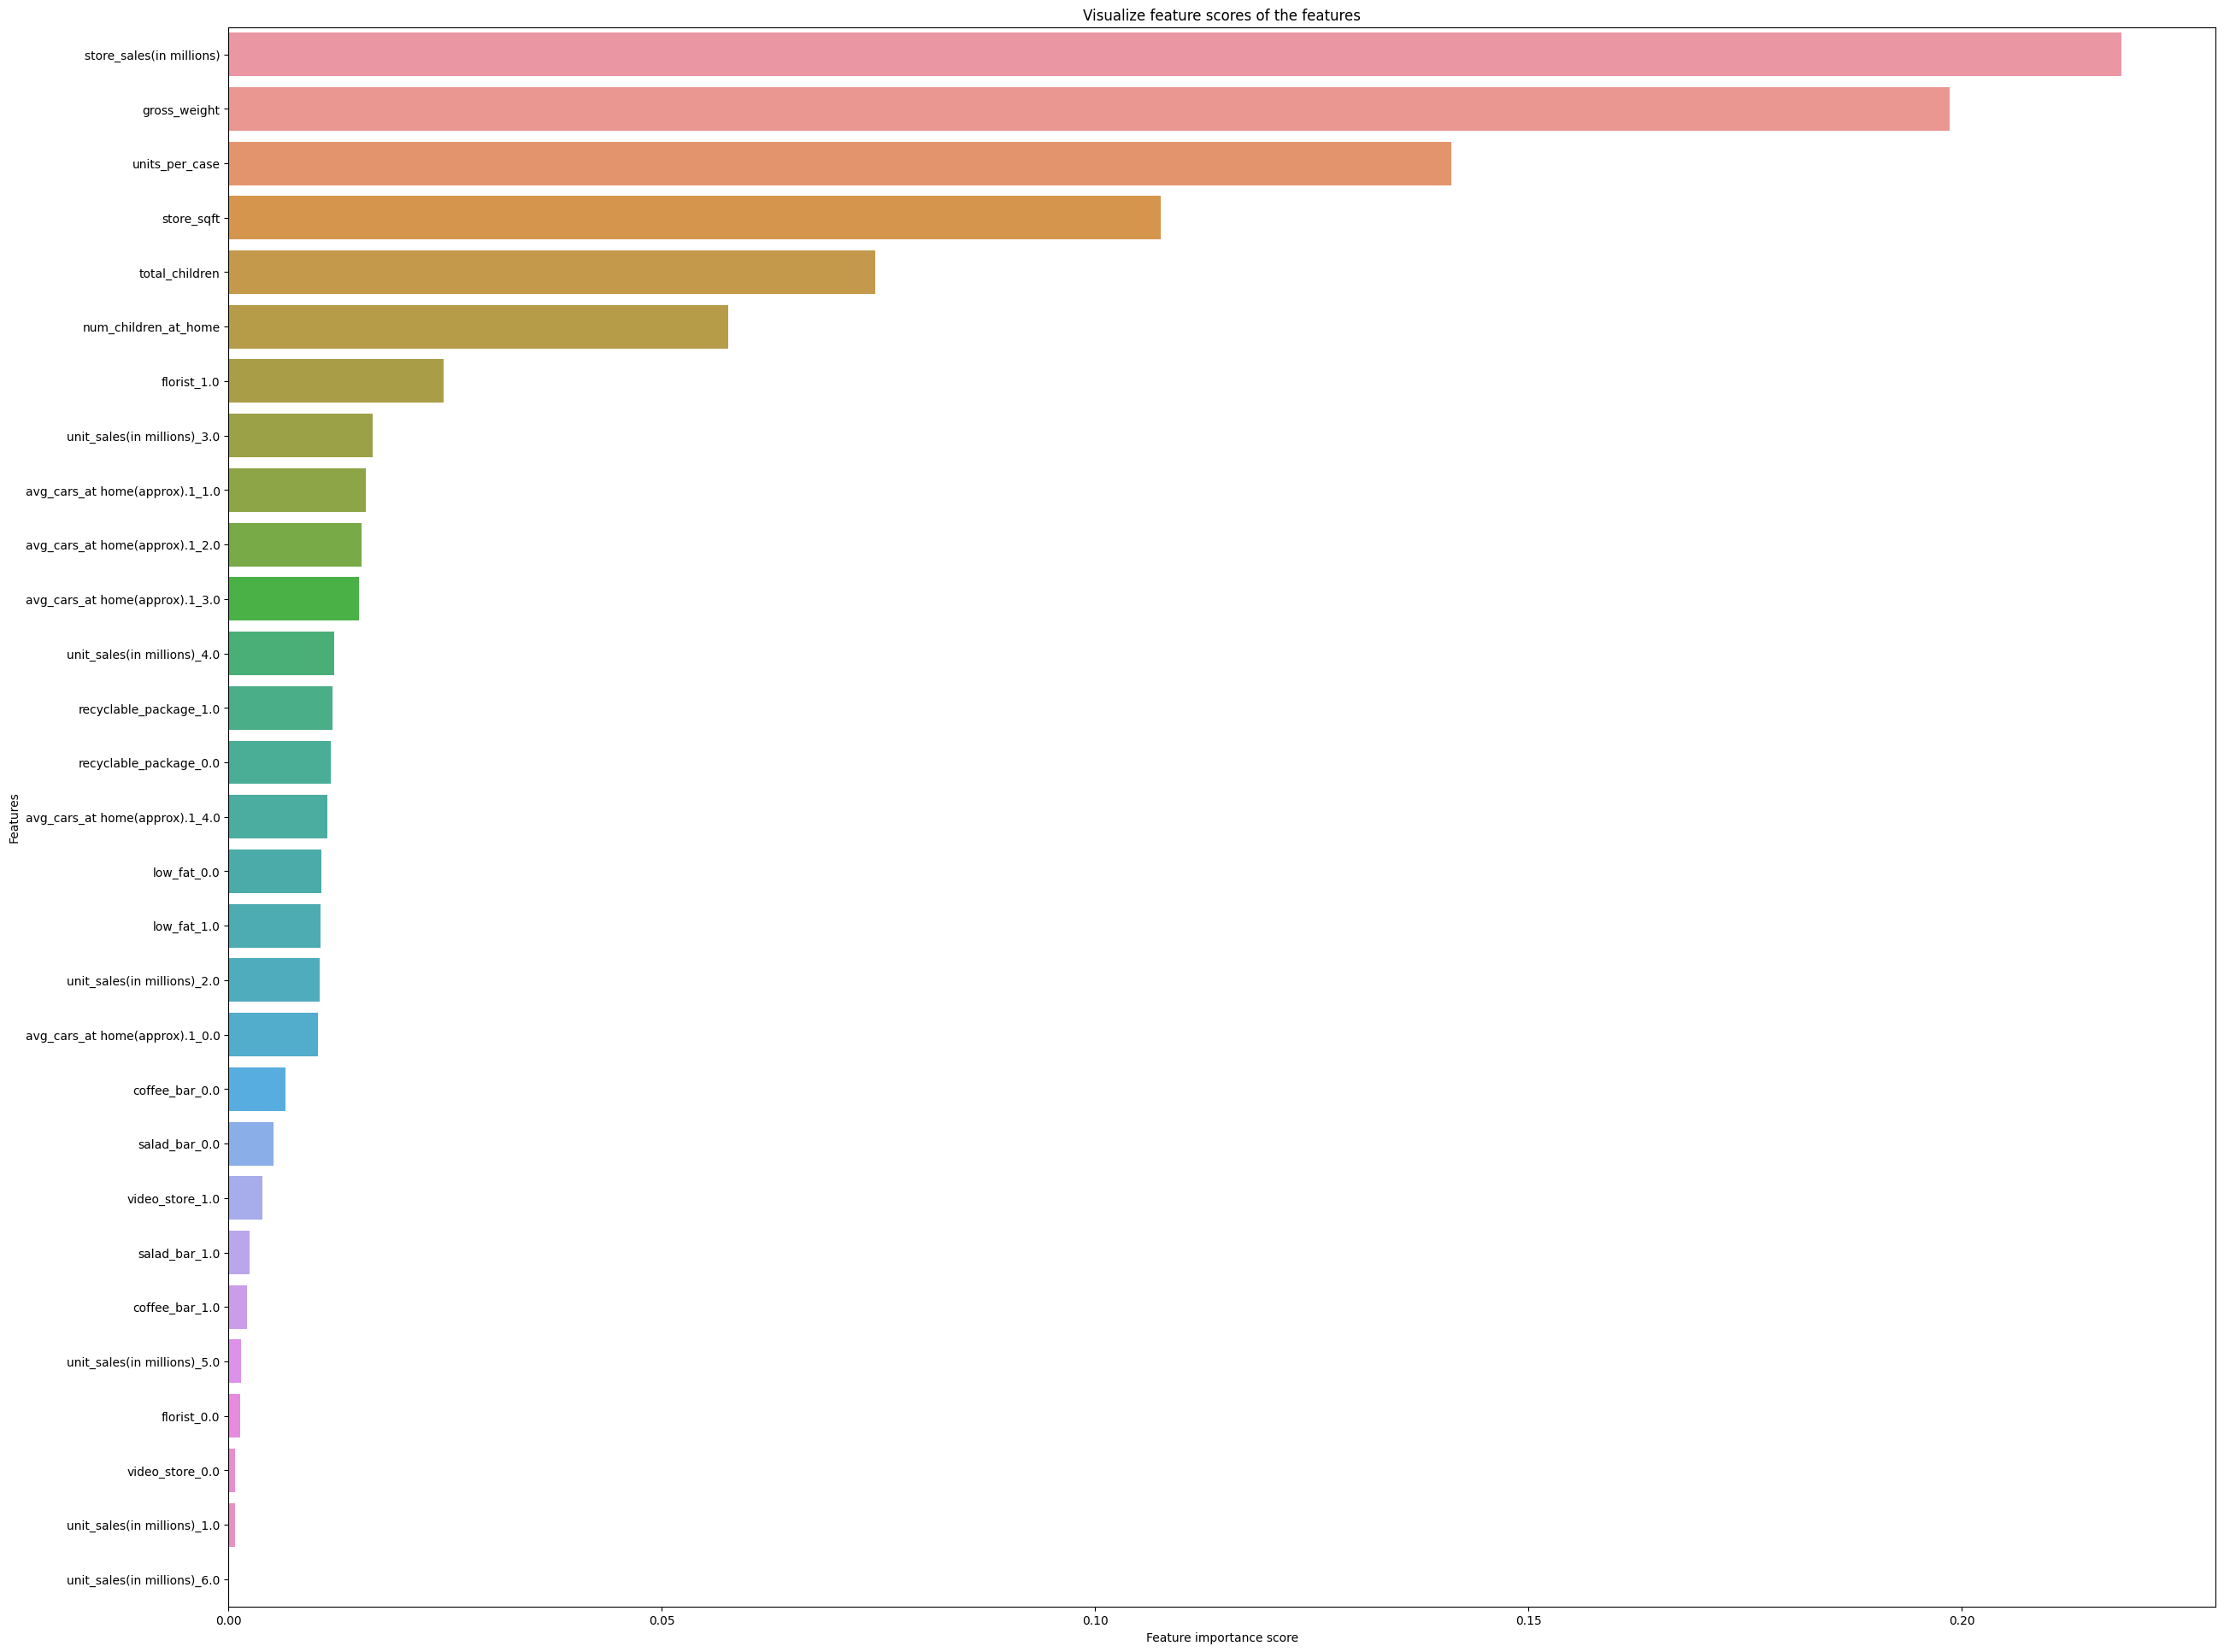

In [59]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=data)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
## based on the top features, select top 5 features and see improvement in the model

In [60]:
best_features_train =transformed_data_train.drop(columns=['florist_0.0','unit_sales(in millions)_6.0','unit_sales(in millions)_1.0','video_store_0.0'])

In [61]:
rf_model_cv.fit(best_features_train,(y_train))

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      n_estimators=200)

In [64]:
best_feature_test2 = transformed_data_test.drop(columns=['florist_0.0','unit_sales(in millions)_6.0','unit_sales(in millions)_1.0','video_store_0.0'])

In [65]:
y_pred_best_feature = rf_model_cv.predict(best_feature_test2)

In [66]:
mean_squared_error(y_test,(y_pred_best_feature))

800.2927216893391

In [68]:
evaluate(rf_model_cv,best_feature_test2,y_test)

Model Performance
Average Error: 23.7757 degrees.
Accuracy = 72.55%.


72.54997525584817